### **Customer Lifetime Value**

[Sumber data Customer Lifetime Value](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning & Feature Engineering
4. Modeling & Benchmarking
5. Conclusion
6. Recommendation

****

### **1. Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) adalah estimasi total nilai finansial yang dapat dihasilkan oleh seorang pelanggan selama hubungan bisnisnya dengan perusahaan.


Dalam industri asuransi, CLV menjadi metrik krusial untuk:  
1. Menentukan strategi retensi pelanggan  
2. Mengoptimalkan biaya akuisisi pelanggan (Customer Acquisition Cost)  
3. Menyusun segmentasi pelanggan berbasis nilai  
4. Meningkatkan profitabilitas jangka panjang perusahaan

**Stakeholder**

- Marketing Team : Menentukan prioritas target campaign
- Sales Team : Fokus upselling & cross-selling
- Management : Strategic decision making

**Problem Statement**

Perusahaan belum memiliki sistem prediktif untuk memperkirakan Customer Lifetime Value (CLV) berdasarkan karakteristik pelanggan, sehingga alokasi anggaran marketing dan strategi retensi masih belum optimal dan berpotensi menyebabkan inefisiensi biaya.

**Goals**

- Membangun model Machine Learning regresi untuk memprediksi CLV
- Menghasilkan error prediksi seminimal mungkin (MAE & RMSE)
- Model dapat digunakan untuk customer baru maupun evaluasi customer existing

**Analytic Approach**

- Supervised Learning (Regression)
- Multiple regression models akan dibandingkan
- Model terbaik dipilih berdasarkan evaluasi metrik dan stabilitas

**Evaluation Metrics**

- MAE : Rata-rata kesalahan absolut
- RMSE : Penalti besar untuk error ekstrem
- R² : Proporsi variansi CLV yang dapat dijelaskan model

In [6]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value.csv')

### **2. Data Understanding**

- Dataset merupakan data historis pelanggan dari sebuah perusahaan dengan model hubungan pelanggan jangka panjang.
- Dataset ini digunakan untuk menganalisis dan memprediksi Customer Lifetime Value (CLV) berdasarkan karakteristik demografis, status pelanggan, serta informasi terkait produk dan transaksi.
- Setiap baris data merepresentasikan satu pelanggan, sedangkan setiap kolom merepresentasikan atribut pelanggan atau nilai finansial terkait.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Kategori atau kelas produk utama yang dimiliki oleh pelanggan |
| Coverage | Object | Jenis paket atau tingkat layanan yang dipilih oleh pelanggan |
| Renew Offer Type | Object | Jenis penawaran yang diberikan kepada pelanggan pada saat perpanjangan |
| EmploymentStatus | Object | Status pekerjaan pelanggan |
| Marital Status | Object | Status pernikahan pelanggan |
| Education | Object | Tingkat pendidikan terakhir pelanggan |
| Number of Policies | Float | Jumlah polis atau kontrak aktif yang dimiliki pelanggan |
| Monthly Premium Auto | Float | Nilai pembayaran rutin bulanan yang dibayarkan pelanggan |
| Total Claim Amount | Float | Total nilai klaim atau penggunaan layanan oleh pelanggan |
| Income | Float | Pendapatan pelanggan |
| Customer Lifetime Value | Float | Estimasi total nilai finansial pelanggan selama masa hubungan dengan perusahaan (target variable) |

<br>

In [8]:
# Preview data
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [9]:
# Struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [10]:
# Statistik deskriptif
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


**Interpretasi Awal**
- Dataset berisi data demografis, polis, premi, klaim, dan CLV
- Target variabel bersifat continuous -> regresi

#### **Exploratory Data Analysis**

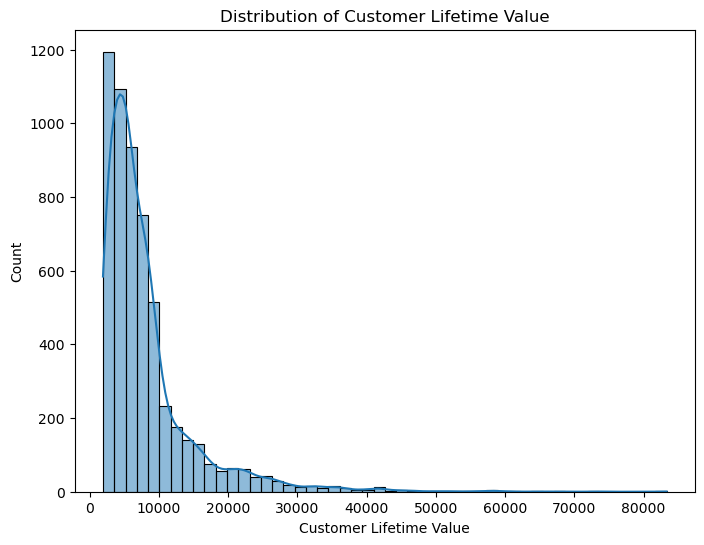

In [11]:
# Distribusi target CLV
plt.figure(figsize=(8,6))
sns.histplot(df['Customer Lifetime Value'], bins=50, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.show()

Grafik di atas menunjukkan distribusi dari variabel Customer Lifetime Value (CLV). Terlihat bahwa distribusi CLV bersifat right-skewed (positively skewed), di mana sebagian besar pelanggan memiliki nilai CLV yang relatif rendah hingga menengah, sementara hanya sebagian kecil pelanggan yang memiliki CLV sangat tinggi.

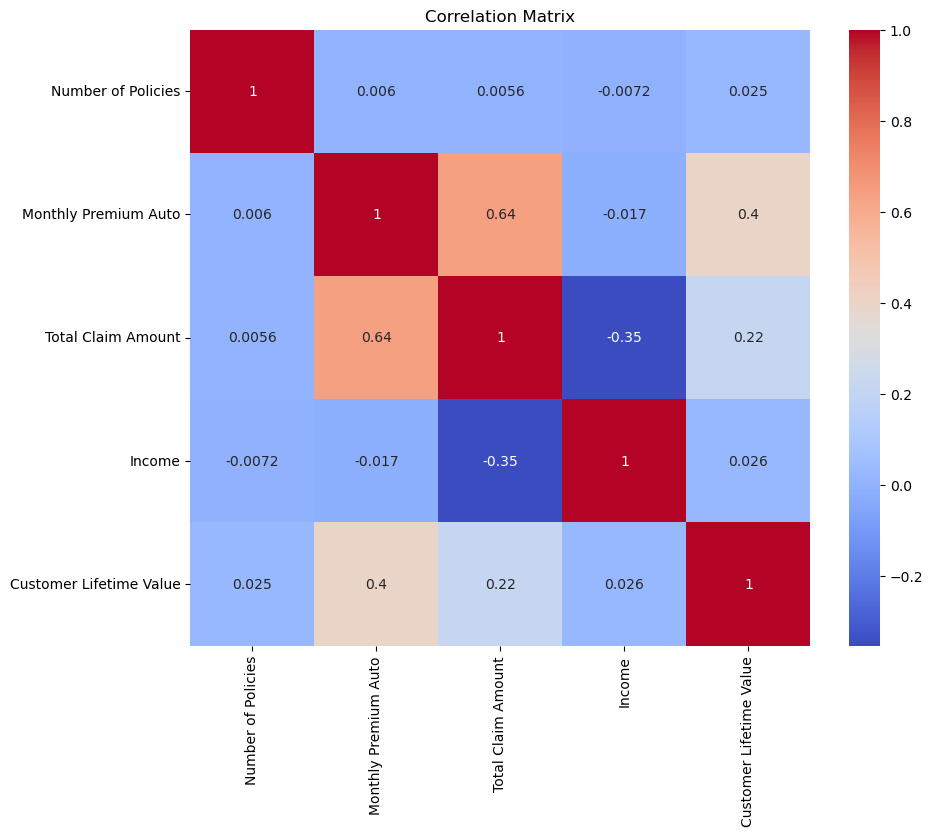

In [12]:
# Korelasi numerikal
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation matrix di atas menunjukkan hubungan linier antar variabel numerikal pada dataset, termasuk hubungannya dengan Customer Lifetime Value (CLV) sebagai target variabel. Nilai korelasi berada pada rentang -1 hingga 1, di mana nilai mendekati 1 atau -1 menunjukkan hubungan linier yang kuat, sedangkan nilai mendekati 0 menunjukkan hubungan linier yang lemah.

**Hubungan antar variabel independen**
- Monthly Premium Auto dan Total Claim Amount memiliki korelasi positif yang cukup kuat (≈ 0.64). Hal ini mengindikasikan bahwa pelanggan dengan premi bulanan yang lebih tinggi cenderung memiliki total klaim yang lebih besar, yang merupakan pola yang masuk akal secara logis karena nilai transaksi yang lebih besar biasanya berbanding lurus dengan besarnya penggunaan layanan.
- Total Claim Amount dan Income menunjukkan korelasi negatif moderat (≈ -0.35). Ini mengindikasikan bahwa pelanggan dengan pendapatan lebih tinggi cenderung memiliki total klaim yang relatif lebih rendah, yang dapat mencerminkan perbedaan perilaku atau kebutuhan layanan antar kelompok pendapatan.

**Hubungan variabel terhadap Customer Lifetime Value**
- Monthly Premium Auto memiliki korelasi positif moderat dengan CLV (≈ 0.40), yang menjadikannya salah satu indikator numerikal paling relevan dalam memprediksi CLV. Hal ini menunjukkan bahwa semakin besar pembayaran rutin pelanggan, semakin tinggi potensi nilai jangka panjang yang diberikan kepada perusahaan.
- Total Claim Amount memiliki korelasi positif yang lebih lemah terhadap CLV (≈ 0.22). Ini mengindikasikan bahwa meskipun klaim mencerminkan aktivitas penggunaan layanan, kontribusinya terhadap CLV tidak sekuat premi bulanan.
- Number of Policies dan Income menunjukkan korelasi yang sangat lemah terhadap CLV (mendekati 0). Hal ini menandakan bahwa hubungan keduanya dengan CLV bersifat tidak linier atau dipengaruhi oleh interaksi dengan variabel lain.

**Implikasi terhadap Pemodelan**
- Tidak adanya korelasi linier yang sangat kuat antara satu variabel dengan CLV menunjukkan bahwa CLV dipengaruhi oleh kombinasi beberapa fitur, bukan oleh satu faktor tunggal.
- Korelasi antar fitur numerikal yang relatif moderat menunjukkan bahwa risiko multikolinearitas masih dalam batas yang dapat diterima, terutama untuk model regresi.
- Karena sebagian hubungan kemungkinan bersifat non-linear, penggunaan model regresi yang lebih fleksibel (misalnya ensemble-based regression) berpotensi memberikan performa yang lebih baik dibandingkan regresi linier sederhana.

### **3. Data Cleaning & Feature Engineering**

In [13]:
# Copy dataset
df_model = df.copy()

In [21]:
# Missing values
df_model.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
CLV_log                    0
dtype: int64

In [17]:
# Drop duplicate
df_model = df_model.drop_duplicates()

Tidak ditemukan missing values pada dataset.
Data duplikat dihapus untuk menghindari bias pada proses training model.

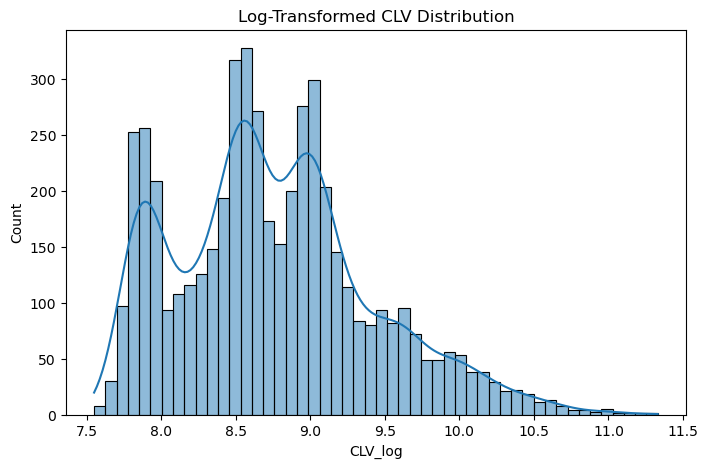

In [23]:
# Log transform target
df_model['CLV_log'] = np.log(df_model['Customer Lifetime Value'])

plt.figure(figsize=(8,5))
sns.histplot(df_model['CLV_log'], bins=50, kde=True)
plt.title('Log-Transformed CLV Distribution')
plt.show()

Log transformation dilakukan untuk:
- Mengurangi skewness
- Menstabilkan varians
- Membantu model regresi menangkap pola dengan lebih konsisten

In [24]:
# Feature separation
TARGET = 'CLV_log'

X = df_model.drop(columns=['Customer Lifetime Value', 'CLV_log'])
y = df_model[TARGET]

cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(exclude='object').columns.tolist()

In [25]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_features),
    ('num', StandardScaler(), num_features)
])


Note :  
- OneHotEncoder digunakan untuk fitur kategorikal.
- StandardScaler digunakan agar fitur numerikal berada pada skala yang sama, terutama untuk model regresi berbasis jarak atau regularisasi.

### **4. Modeling & Benchmarking**

In [26]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression' : Ridge(alpha=1.0),
    'Lasso Regression' : Lasso(alpha=0.001),
    'Random Forest'    : RandomForestRegressor(random_state=42)
}

In [29]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    mae_cv = -cross_val_score(
        pipe, X_train, y_train,
        scoring='neg_mean_absolute_error',
        cv=cv
    ).mean()
    
    rmse_cv = -cross_val_score(
        pipe, X_train, y_train,
        scoring='neg_root_mean_squared_error',
        cv=cv
    ).mean()
    
    r2_cv = cross_val_score(
        pipe, X_train, y_train,
        scoring='r2',
        cv=cv
    ).mean()
    
    cv_results.append([name, mae_cv, rmse_cv, r2_cv])

cv_results_df = pd.DataFrame(
    cv_results,
    columns=['Model', 'CV_MAE', 'CV_RMSE', 'CV_R2']
)

cv_results_df

,Model,CV_MAE,CV_RMSE,CV_R2
0,Linear Regression,0.433635,0.562406,0.263610
1,Ridge Regression,0.433528,0.562342,0.263773
2,Lasso Regression,0.432835,0.562390,0.263597
3,Random Forest,0.107349,0.214792,0.892625


In [30]:
# Evaluation Test
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=['Model', 'Test_MAE', 'Test_RMSE', 'Test_R2']
)

results_df

,Model,Test_MAE,Test_RMSE,Test_R2
0,Linear Regression,0.443006,0.570383,0.260649
1,Ridge Regression,0.442983,0.570365,0.260696
2,Lasso Regression,0.441341,0.569115,0.263932
3,Random Forest,0.111705,0.220341,0.889666


Berdasarkan hasil cross-validation dan evaluasi pada test set, model Random Forest menunjukkan performa terbaik dengan nilai MAE dan RMSE paling rendah serta nilai R² tertinggi, baik pada data training maupun data pengujian. Model regresi linear (Linear, Ridge, dan Lasso Regression) digunakan sebagai baseline karena interpretabilitasnya dan performanya yang relatif konsisten, namun memiliki kemampuan terbatas dalam menangkap hubungan yang kompleks antar variabel. Peningkatan performa yang signifikan pada model Random Forest mengindikasikan adanya pola non-linear dan interaksi antar fitur yang tidak dapat dimodelkan secara optimal oleh regresi linier.

Konsistensi performa Random Forest antara hasil cross-validation dan test set menunjukkan bahwa model **memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting yang signifikan.**

**Model Evaluation & Interpretation**

Pemilihan Model:
- Model dengan RMSE & MAE terendah = error prediksi lebih kecil
- R² = seberapa baik variasi CLV dijelaskan oleh model
- Performa Random Forest konsisten pada CV dan test = generalisasi baik

In [32]:
# Final model (best model)
best_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Metrics (log scale)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Random Forest - Test Performance (log scale)")
print(f"MAE  : {mae_best:.4f}")
print(f"RMSE : {rmse_best:.4f}")
print(f"R2   : {r2_best:.4f}")

Random Forest - Test Performance (log scale)
MAE  : 0.1117
RMSE : 0.2203
R2   : 0.8897


**Actual vs Predicted Plot**

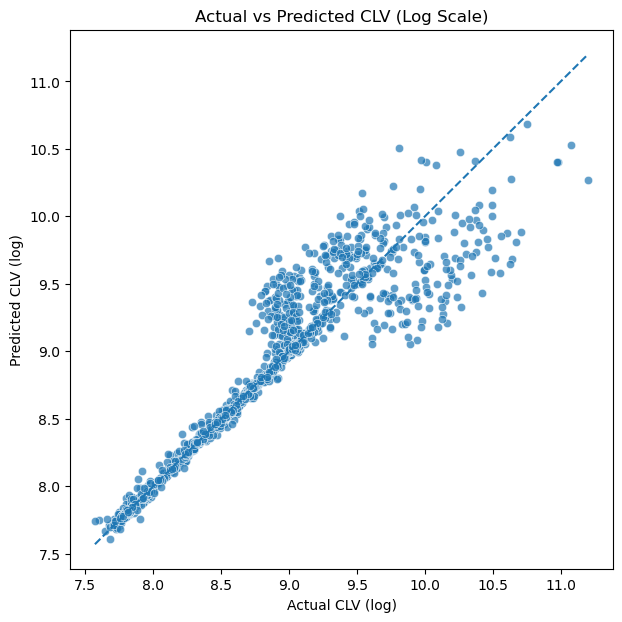

In [33]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7)

# garis ideal y=x
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel('Actual CLV (log)')
plt.ylabel('Predicted CLV (log)')
plt.title('Actual vs Predicted CLV (Log Scale)')
plt.show()

Grafik Actual vs Predicted CLV (log scale) menunjukkan bahwa sebagian besar titik data berada di sekitar garis diagonal (y = x), yang merepresentasikan kondisi prediksi sempurna. Hal ini mengindikasikan bahwa model Random Forest mampu memprediksi nilai Customer Lifetime Value dengan tingkat akurasi yang baik pada sebagian besar observasi.

Namun, pada nilai CLV yang lebih tinggi, terlihat adanya penyebaran titik yang semakin melebar dari garis ideal. Pola ini menunjukkan bahwa model cenderung mengalami underestimation maupun overestimation pada pelanggan dengan CLV tinggi. Fenomena ini umum terjadi pada data finansial yang bersifat skewed dan memiliki nilai ekstrem.

Secara keseluruhan, pola sebaran ini konsisten dengan nilai R² yang tinggi pada data uji, yang menandakan bahwa model mampu menjelaskan sebagian besar variasi CLV meskipun masih memiliki keterbatasan pada rentang nilai ekstrem.

**Residual Plot**

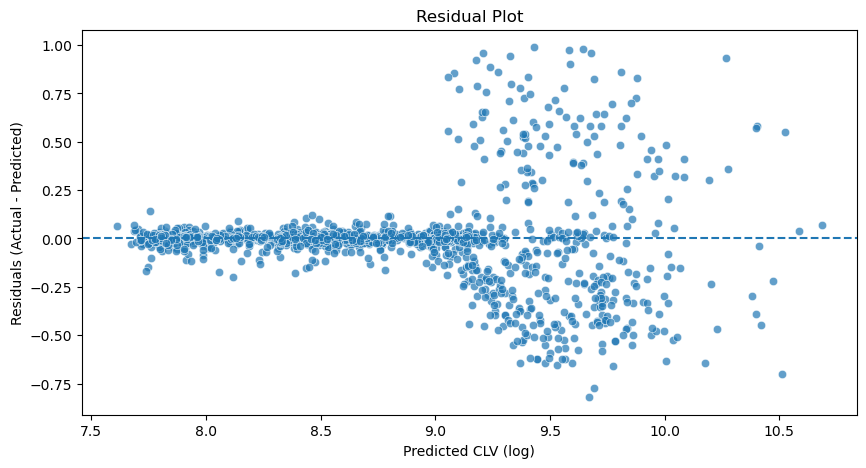

In [34]:
residuals = y_test - y_pred_best

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.7)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted CLV (log)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

Residual plot menunjukkan bahwa residual tersebar di sekitar garis nol tanpa pola linier yang jelas pada sebagian besar rentang prediksi, yang mengindikasikan bahwa model tidak mengalami bias sistematis yang kuat.

Namun, pada nilai Predicted CLV (log) yang lebih tinggi, terlihat peningkatan variabilitas residual. Hal ini mengindikasikan bahwa model menjadi kurang stabil dalam memprediksi pelanggan dengan CLV sangat tinggi. Kondisi ini mengonfirmasi hasil pada grafik Actual vs Predicted, di mana error cenderung lebih besar pada nilai ekstrem.

Temuan ini menunjukkan bahwa model memiliki performa yang baik pada mayoritas pelanggan, tetapi prediksi pada segmen pelanggan bernilai sangat tinggi perlu diinterpretasikan dengan lebih hati-hati.

In [36]:
# Evaluation in Original CLV Scale
y_test_clv = np.exp(y_test)
y_pred_clv = np.exp(y_pred_best)

mae_clv = mean_absolute_error(y_test_clv, y_pred_clv)
rmse_clv = np.sqrt(mean_squared_error(y_test_clv, y_pred_clv))

print("\nRandom Forest - Test Performance (Original CLV scale)")
print(f"MAE  : {mae_clv:,.2f}")
print(f"RMSE : {rmse_clv:,.2f}")


Random Forest - Test Performance (Original CLV scale)
MAE  : 1,613.45
RMSE : 4,071.06


Setelah dilakukan transformasi balik dari skala log ke skala CLV asli, diperoleh nilai MAE sebesar sekitar 1.613 dan RMSE sebesar sekitar 4.071. Nilai ini menunjukkan bahwa secara rata-rata, prediksi CLV oleh model dapat meleset sekitar +/- 1.600 unit nilai CLV dari nilai aktual.

Meskipun nilai error terlihat cukup besar dalam skala absolut, hal ini perlu dipahami dalam konteks distribusi CLV yang memiliki rentang nilai yang luas dan bersifat right-skewed. Oleh karena itu, model ini lebih tepat digunakan sebagai decision-support tool untuk prioritisasi pelanggan, bukan sebagai estimasi nilai absolut yang presisi untuk setiap individu pelanggan.

**CLV-Based Customer Prioritization**

Walaupun model menghasilkan nilai CLV kontinu (regresi), dalam praktik bisnis perusahaan perlu membuat keputusan diskrit, seperti:
- Customer mana yang diprioritaskan untuk retensi
- Customer mana yang layak diberikan program loyalty

Oleh karena itu, hasil regresi CLV diterjemahkan menjadi decision threshold berbasis persentil.

In [ ]:
# Inverse log transform untuk interpretasi CLV aktual
clv_actual = np.exp(y_test)
clv_pred = np.exp(y_pred_best)

In [44]:
# Buat dataframe evaluasi
df_eval = pd.DataFrame({
    'Actual_CLV': clv_actual,
    'Predicted_CLV': clv_pred
})

In [41]:
# Tentukan threshold berbasis distribusi CLV aktual
p25 = df_eval['Actual_CLV'].quantile(0.25)
p75 = df_eval['Actual_CLV'].quantile(0.75)

In [42]:
# Kategori CLV berbasis business rule
def clv_segment(value):
    if value < p25:
        return 'Low Value Customer'
    elif value <= p75:
        return 'Mid Value Customer'
    else:
        return 'High Value Customer'

df_eval['CLV_Segment'] = df_eval['Predicted_CLV'].apply(clv_segment)

In [43]:
# Distribusi segmen CLV
df_eval['CLV_Segment'].value_counts()

CLV_Segment
Mid Value Customer     659
High Value Customer    478
Low Value Customer     379
Name: count, dtype: int64

Distribusi segmen menunjukkan bahwa sebagian besar pelanggan berada pada kategori Mid Value, sementara High Value Customer merupakan kelompok yang lebih kecil namun strategis untuk prioritisasi bisnis.

**Error Analysis Berdasarkan Nilai Bisnis**

In [60]:
# Hitung absolute error
df_eval['Absolute_Error'] = abs(df_eval['Actual_CLV'] - df_eval['Predicted_CLV'])

# Rata-rata error per segmen CLV
error_by_segment = df_eval.groupby('CLV_Segment')['Absolute_Error'].mean()
error_by_segment

CLV_Segment
High Value Customer    4819.798999
Low Value Customer       60.941796
Mid Value Customer      180.621785
Name: Absolute_Error, dtype: float64

Hasil analisis menunjukkan bahwa rata-rata absolute error pada segmen High Value Customer lebih besar dibandingkan segmen lainnya. Hal ini wajar mengingat skala nilai CLV pada segmen tersebut juga jauh lebih tinggi, sehingga selisih absolut antara nilai aktual dan prediksi menjadi lebih besar.

Oleh karena itu, hasil prediksi CLV pada segmen bernilai tinggi sebaiknya digunakan sebagai indikator prioritas relatif, bukan sebagai estimasi nilai absolut yang presisi. Temuan ini memperkuat bahwa model lebih sesuai digunakan sebagai decision-support tool dalam konteks bisnis.

**Model Reability Zone**

Model regresi ini tidak dirancang untuk memprediksi seluruh kemungkinan tipe customer. Model paling dapat dipercaya ketika digunakan pada rentang data yang serupa dengan data training.

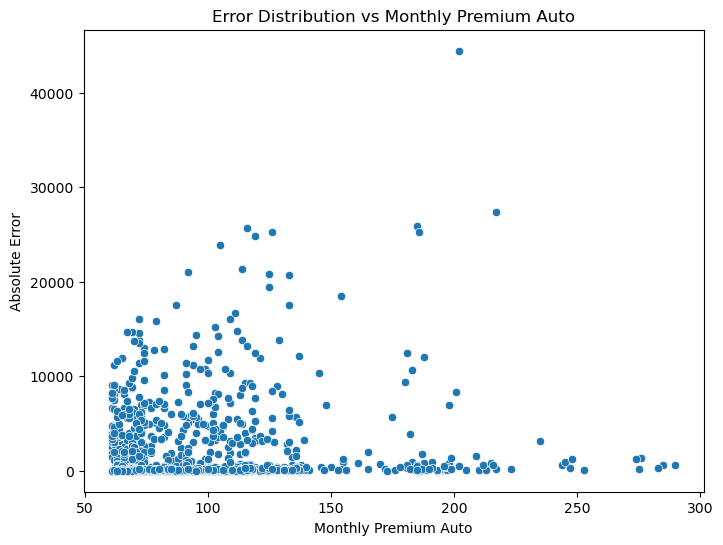

In [56]:
# Contoh reliability check menggunakan fitur numerikal utama
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Monthly Premium Auto'], y=df_eval['Absolute_Error'])
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Absolute Error')
plt.title('Error Distribution vs Monthly Premium Auto')
plt.show()

Dari visualisasi di atas dapat disimpulkan bahwa error prediksi relatif stabil pada rentang nilai Monthly Premium Auto yang mendominasi data training. Namun, pada nilai premium yang lebih ekstrem, terlihat peningkatan variabilitas error. Hal ini menunjukkan bahwa model menjadi kurang andal ketika digunakan pada karakteristik pelanggan yang jarang muncul dalam data training.

**Marketing Cost Saving Simulation**

In [57]:
# Jumlah customer total
total_customer = len(df_eval)

# Jumlah high value customer
high_value_customer = df_eval[df_eval['CLV_Segment'] == 'High Value Customer'].shape[0]

# Asumsi biaya marketing per customer
marketing_cost_per_customer = 1 # unit cost (bisa dianggap 1 juta / 1 dollar)

# Total biaya tanpa model (target semua customer)
total_cost_without_model = total_customer * marketing_cost_per_customer

# Total biaya dengan model (target high CLV saja)
total_cost_with_model = high_value_customer * marketing_cost_per_customer

# Penghematan biaya
cost_saving = total_cost_without_model - total_cost_with_model
cost_saving_pct = cost_saving / total_cost_without_model * 100

# Ringkasan simulasi
pd.DataFrame({
'Scenario': ['Without CLV Model', 'With CLV Model'],
'Targeted Customers': [total_customer, high_value_customer],
'Total Marketing Cost': [total_cost_without_model, total_cost_with_model]
})

print(f"Estimated Marketing Cost Saving: {cost_saving_pct:.2f}%")

Estimated Marketing Cost Saving: 68.47%


Simulasi ini menggambarkan bagaimana hasil prediksi CLV dari model regresi dapat digunakan untuk meningkatkan efisiensi biaya pemasaran. Pada skenario tanpa model, perusahaan menargetkan seluruh pelanggan sehingga biaya pemasaran bersifat maksimal. Pada skenario dengan model, perusahaan memfokuskan kampanye hanya pada segmen High Value Customer berdasarkan prediksi CLV.

Dengan asumsi biaya pemasaran per pelanggan bersifat konstan (unit cost), strategi targeting ini menghasilkan estimasi penghematan biaya pemasaran sebesar 68.47% dibandingkan menargetkan seluruh pelanggan. Penghematan ini dapat dialokasikan untuk strategi yang lebih berdampak seperti program retensi, loyalty rewards, serta upselling dan cross-selling.

Perlu dicatat bahwa angka ini merupakan simulasi berbasis asumsi sederhana dan bertujuan untuk menunjukkan arah dampak bisnis (cost saving) dari penggunaan model CLV sebagai decision-support tool.

### **5. Conclusion**

Pada project ini, telah dibangun model machine learning berbasis regression untuk memprediksi Customer Lifetime Value (CLV) menggunakan data historis pelanggan. Setelah melalui tahapan data understanding, data cleaning, feature engineering, serta benchmarking beberapa model regresi, Random Forest Regression dipilih sebagai model terbaik berdasarkan nilai MAE dan RMSE yang paling rendah serta nilai R² yang paling tinggi, baik pada cross-validation maupun test set.

Hasil evaluasi menunjukkan bahwa model memiliki kemampuan generalisasi yang baik, dengan perbedaan performa yang relatif kecil antara data training dan data uji. Visualisasi Actual vs Predicted serta residual plot menunjukkan bahwa model mampu menangkap pola CLV dengan baik pada mayoritas pelanggan, meskipun error cenderung meningkat pada pelanggan dengan nilai CLV yang sangat tinggi.

Transformasi logaritmik pada target CLV terbukti membantu mengurangi skewness dan meningkatkan stabilitas model regresi. Namun, hasil evaluasi pada skala CLV asli menunjukkan bahwa prediksi masih memiliki error absolut yang cukup besar pada segmen bernilai tinggi, sehingga model ini lebih tepat digunakan sebagai decision-support tool daripada alat estimasi nilai absolut yang presisi untuk setiap individu pelanggan.

Pada skala Business Impact, penerapan model CLV memungkinkan perusahaan untuk menerjemahkan hasil prediksi menjadi keputusan bisnis yang lebih terarah. Melalui pendekatan CLV-based customer prioritization, pelanggan dapat dikelompokkan ke dalam segmen Low, Mid, dan High Value Customer berdasarkan threshold persentil.
Simulasi sederhana menunjukkan bahwa dengan memfokuskan aktivitas pemasaran hanya pada High Value Customer, perusahaan berpotensi menghemat biaya pemasaran hingga sekitar 68.47% dibandingkan menargetkan seluruh pelanggan. Hal ini menunjukkan bahwa model CLV tidak hanya memberikan insight analitis, tetapi juga memberikan dampak bisnis yang terukur, khususnya dalam optimalisasi alokasi anggaran pemasaran.

### **6. Recommendations**

Berdasarkan hasil analisis dan evaluasi, berikut beberapa rekomendasi yang dapat diberikan:

1. Batasan Model
   - Model belum dirancang untuk memberikan estimasi CLV absolut yang sangat presisi pada setiap individu pelanggan
   - Error prediksi relatif lebih besar pada segmen High Value Customer akibat skala CLV yang tinggi dan distribusi data yang skewed
   - Simulasi cost saving menggunakan asumsi biaya pemasaran per pelanggan yang konstan  
  
2. Pengembangan ke Depan
   - Menambahkan data perilaku pelanggan yang lebih granular
   - Melakukan hyperparameter tuning lanjutan pada model Random Forest
   - Membangun model khusus untuk segmen High Value Customer
   - Mengintegrasikan model ke dalam sistem operasional untuk evaluasi berkala

----------------------------------------------------------------------------------------

### **SAVE FILE**

In [61]:
import pickle

# Final model (pipeline)
final_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train final model dengan seluruh data training
final_model.fit(X_train, y_train)

# Save model
with open('clv_random_forest_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved successfully as clv_random_forest_model.pkl")

Model saved successfully as clv_random_forest_model.pkl
